<table >
    <tr>
        <td><h1>&nbsp&nbsp&nbsp Gerar pasta com Faces usando o DeepFace &nbsp&nbsp&nbsp</h1></td>
        <td><img src="imgs\deepface_icon.png" alt="Imagem 1" width="100" height=auto></td>
    </tr>

<strong><h3> 1.1 - Criar Função "Gerar pasta com faces" </strong>

In [19]:

import os
import cv2
from deepface import DeepFace

def generateFolderWithFaces(output_folder, video_path, target_image_path):
                #(Pasta onde vai ser salvo, caminho de video, Imagem de referência)

    max_saved_faces=10  # Maximo de imagens a serem salvas
    step_frame=20  # Frames a serem pulados
    detected_faces_list = []  # Lista para armazenar as faces detectadas
    detected_faces_counter = 0  # Contador de faces detectadas
    frame_counter = 0  # Contador de frames

    # Carregue a imagem alvo
    target_image = cv2.imread(target_image_path)

    # Carregue o vídeo
    cap = cv2.VideoCapture(video_path)

    # Enquanto o Video estiver aberto:
    while cap.isOpened():

        # Contabiliza frames
        frame_counter += 1

        # Pega o próximo frame
        ret, frame = cap.read()

        # Se Acabou o vídeo ou detectou o limite de faces: Pare
        if not ret or detected_faces_counter >= max_saved_faces:
            break

        # "Pula" alguns frames
        if frame_counter % step_frame != 0:
            continue

        # Detecte as faces no frame usando DeepFace.verify
        detected_faces = DeepFace.verify(frame, target_image, "VGG-Face", enforce_detection=False)
        
        # Se no dicionario 'verified' for verdadeiro e 'similarity_metric' for "cosine":
        # Ou seja se for verificada uma face e ela for cosena (no caso muito parecida com a imagem de referência):
        if detected_faces ['verified'] == True and detected_faces['similarity_metric'] == "cosine":
            
            # Total de faces detectadas até o momento
            detected_faces_counter += 1

            #Para cada Face detectada:
            for i, face in enumerate(detected_faces):

                # Verifique se a face é igual à imagem alvo
                (x, y, w, h) = (int(detected_faces['facial_areas']['img1']['x']), int(detected_faces['facial_areas']['img1']['y']), int(detected_faces['facial_areas']['img1']['w']), int(detected_faces['facial_areas']['img1']['h']))
                face_crop = frame[y:y + h, x:x + w]

                #condiciona a econtrar faces apenas com esses tamanhos entre 150px a 280px
                if h >= 150 and h <=  280:
                    # A função DeepFace retona o frame em BGR sendo assim tranformamos as faces recordas para RGB 
                    cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)

                    # Adicionar a face detectada à lista
                    detected_faces_list.append(face_crop)

                    # Região das faces com o o nuemro de faces ja encontradas e qual seu frame 
                    img_path = os.path.join(output_folder, f"face_{detected_faces_counter}_{frame_counter}.jpg")

                    # Escreve o arquivo na pasta
                    cv2.imwrite(img_path, face_crop)

                
                    # Adicionar retângulo ao redor da face e marcações para exibir bonitinho
                    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 4)

    # Fechar o vídeo após processamento
    cap.release()

    # Retornar a lista de faces detectadas
    return detected_faces_list


<strong><h3>1.2 - Adicionar caminhos para o Leon

In [20]:
# Caminho para o vídeo de entrada para serem retiradas as faces
video_path = 'vids\leon&nilce.mp4'

# Caminho para a foto do rosto da pessoa desejada
foto_path = 'imgs\img_Leon.jpg'

# Pasta para salvar as imagens recortadas
folder_name = 'imgs\Folder_leon'

# Chamada da Função
Leon_faces = generateFolderWithFaces(folder_name, video_path, foto_path)


<strong><h3>1.3 - Adicionar caminhos para Nilce

In [21]:
# Caminho para o vídeo de entrada
video_path = 'vids\leon&nilce.mp4'

# Caminho para a foto do rosto da pessoa desejada
foto_path = 'imgs\img_Nilce.jpg'

# Pasta para salvar as imagens recortadas
folder_name = 'imgs\Folder_nilce'

Nilce_faces = generateFolderWithFaces(folder_name, video_path, foto_path)

<strong><h3> 2.1 - Função de mostrar Imagens utilizando a matplotlib

In [22]:
import matplotlib.pyplot as plt

def display_images(image_folder, num_images=5):

    # Lista de nomes de arquivo das imagens na pasta
    file_names = os.listdir(image_folder)

    # Crie uma figura com subplots para exibir as imagens
    fig, axes = plt.subplots(1, num_images, figsize=(16, 16))

    # Loop para exibir as primeiras num_images imagens
    for i in range(num_images):
        # Leia a imagem do arquivo
        image_path = os.path.join(image_folder, file_names[i])
        image = cv2.imread(image_path)

        # Converta a imagem para o formato RGB (matplotlib usa RGB)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Exiba a imagem no subplot correspondente
        axes[i].imshow(image_rgb)
        axes[i].axis('off')  # Desative os eixos

        # Defina um título para a imagem
        axes[i].set_title(f'Face {i + 1}', fontsize=12)

    # Ajuste o espaçamento entre os subplots
    plt.tight_layout()

    # Exiba as imagens
    plt.show()

<strong><h3>2.1 - Chamada para o Leon


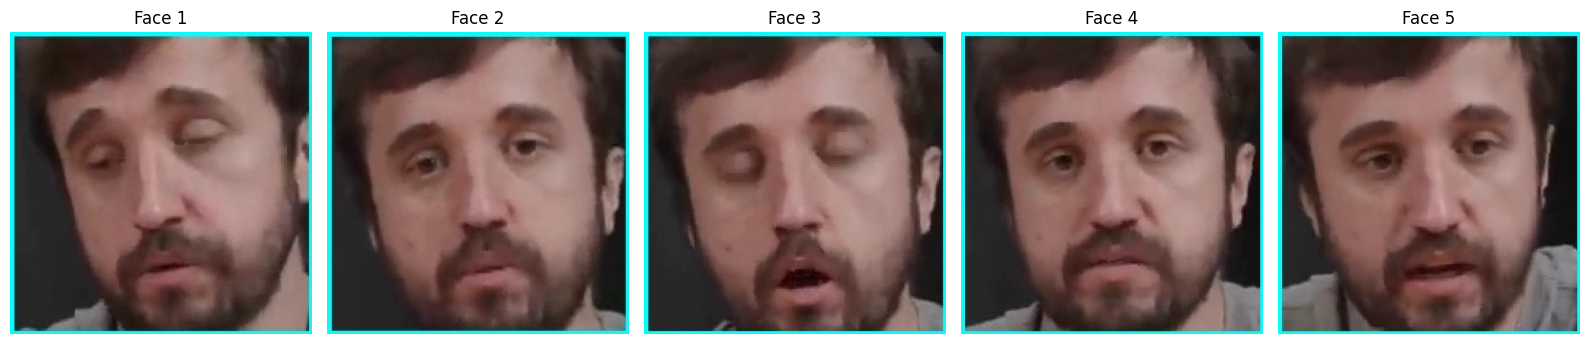

In [23]:

folder_name = 'imgs\Folder_Leon'
display_images(folder_name, num_images=5)

<strong><h3>2.2 - Chamada para a Nilce


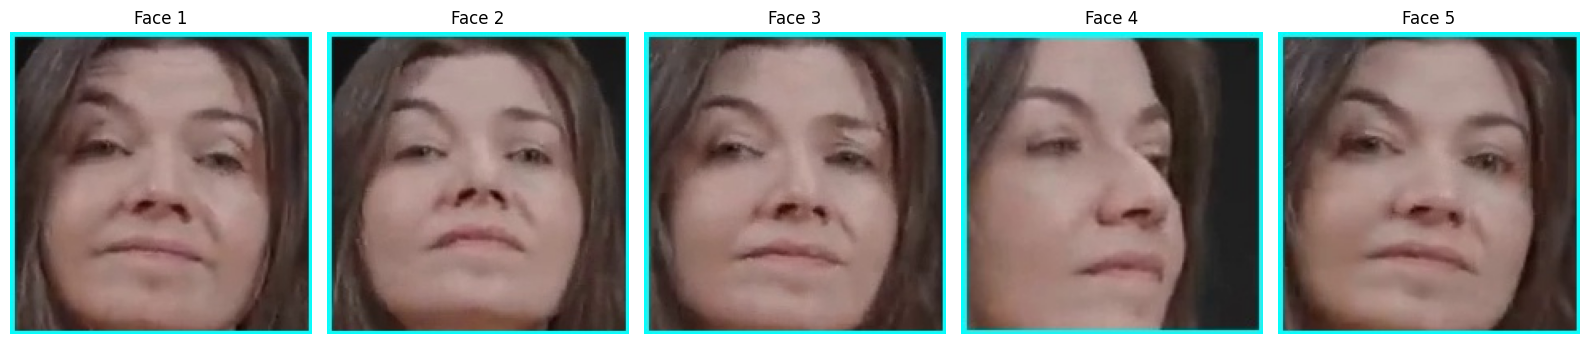

In [24]:
folder_name = 'imgs\Folder_Nilce'
display_images(folder_name, num_images=5)